<a href="https://colab.research.google.com/github/crudables/Data-Analys/blob/main/udacity/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import pandas,matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read csv file from disk
df = pd.read_csv('noshow.csv')


In [5]:
#change columns to lowercase
df.columns = df.columns.str.lower()

In [6]:
#rename no-show to no_show
df.rename({'no-show':'no_show'},axis=1,inplace=True)

In [7]:
#change datatype to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday']) 

In [8]:
#get day of week from datetime
df['day'] = df['appointmentday'].dt.day_name()

In [9]:
#DataFrame for missed appointment
df_no = df[df.no_show == 'No']

In [39]:
#DataFrame for attended appointment
df_yes = df.loc[df.no_show=='Yes']

In [ ]:
# Average age of patients who missed appointment
df_no['age'].mean()

37.790064393252315

In [ ]:
#average age of patients who did not miss appointment
df_yes['age'].mean()

34.31766656212196

In [ ]:
#find day of most appointment miss
dd_no = pd.DataFrame(df_no.day.value_counts())

#reset index
dd_no = dd_no.reset_index()

#rename index to day
dd_no.columns = ['day','misses']
#sort by day column
dd_no.sort_values(by='day',inplace=True)

In [ ]:
dd_all = pd.DataFrame(df.day.value_counts())
dd_all= dd_all.reset_index()
dd_all.columns = ['day','appointment']

dd_all.sort_values(by='day',inplace=True)

In [ ]:
dd_no['appointments'] = dd_all['appointment']

dd_no['percentage_miss'] = (dd_no['misses']/dd_no['appointments'])*100

In [ ]:
y = dd_no['day']
y

3       Friday
2       Monday
5     Saturday
4     Thursday
1      Tuesday
0    Wednesday
Name: day, dtype: object

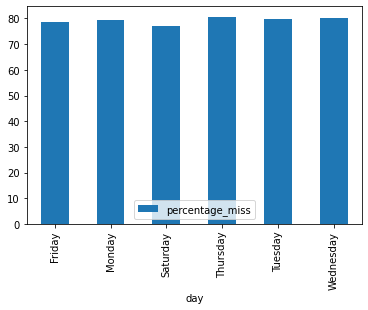

In [78]:
y = dd_no['day']
# Bar graph show percentage of appointment misses on each day.
dd_no.plot(kind='bar',x='day',y='percentage_miss')

In [ ]:
plt.pl

In [79]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','110-120']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)

In [80]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day,age_range
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,61-70
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,51-60
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,61-70
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,1-10
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,51-60
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,51-60
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,21-30
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,31-40


In [81]:
df.groupby('age_range').count()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day
age_range,,,,,,,,,,,,,,,
1-10,15210,15210,15210,15210,15210,15210,15210,15210,15210,15210,15210,15210,15210,15210,15210
11-20,13099,13099,13099,13099,13099,13099,13099,13099,13099,13099,13099,13099,13099,13099,13099
21-30,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783
31-40,15052,15052,15052,15052,15052,15052,15052,15052,15052,15052,15052,15052,15052,15052,15052
41-50,14420,14420,14420,14420,14420,14420,14420,14420,14420,14420,14420,14420,14420,14420,14420
51-60,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661,15661
61-70,11189,11189,11189,11189,11189,11189,11189,11189,11189,11189,11189,11189,11189,11189,11189
71-80,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721
81-90,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544


In [37]:
dno =df[df.no_show =='No']
dyes = df[df.no_show == 'Yes']

In [101]:
dno = pd.DataFrame(dno.age_range.value_counts())
dno = dno.reset_index()
dno.columns = ['age_range','misses']

In [103]:
dno.sort_values(by='age_range',inplace=True)

In [110]:
dno

,age_range,misses
1,1-10,12061
5,11-20,9791
4,21-30,10389
2,31-40,11820
3,41-50,11550
0,51-60,12940
6,61-70,9541
7,71-80,4832
8,81-90,2137
9,91-100,242


In [108]:
dall = pd.DataFrame(df.age_range.value_counts())
dall.reset_index(inplace=True)
dall.columns = ['age_range','appointments']
dall.sort_values(by='age_range', inplace=True)

In [109]:
dall.head(20)

,age_range,appointments
1,1-10,15210
5,11-20,13099
4,21-30,13783
2,31-40,15052
3,41-50,14420
0,51-60,15661
6,61-70,11189
7,71-80,5721
8,81-90,2544
9,91-100,301


In [111]:
dno['total_appointments'] = dall['appointments']

In [112]:
dno

,age_range,misses,total_appointments
1,1-10,12061,15210
5,11-20,9791,13099
4,21-30,10389,13783
2,31-40,11820,15052
3,41-50,11550,14420
0,51-60,12940,15661
6,61-70,9541,11189
7,71-80,4832,5721
8,81-90,2137,2544
9,91-100,242,301


In [115]:
dno['percentage_miss'] = (dno['misses']/dno['total_appointments'])*100

In [116]:
dno

,age_range,misses,total_appointments,percentage_miss
1,1-10,12061,15210,79.296515
5,11-20,9791,13099,74.746164
4,21-30,10389,13783,75.375463
2,31-40,11820,15052,78.527770
3,41-50,11550,14420,80.097087
0,51-60,12940,15661,82.625631
6,61-70,9541,11189,85.271249
7,71-80,4832,5721,84.460759
8,81-90,2137,2544,84.001572
9,91-100,242,301,80.398671


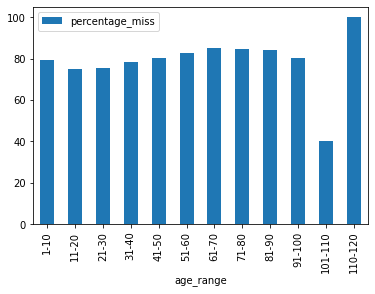

In [118]:
dno.plot(x='age_range',y='percentage_miss',kind='bar')

In [ ]:
#Looks like older people miss more appointments

In [119]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day,age_range
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,61-70
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,51-60
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,61-70
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,1-10
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,51-60


In [120]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [ ]:
df_g=pd.DataFrame(df_no.gender.value_counts())
df_g.reset_index(inplace=True)
df_g.columns = ['gender','misses']
df_g.sort_values(by='gender')

In [124]:
df_fm = pd.DataFrame(df.gender.value_counts())
df_fm.reset_index(inplace=True)
df_fm.columns = ['gender','total_appointments']
df_fm.sort_values(by='gender')

,gender,total_appointments
0,F,71840
1,M,38687


In [127]:
df_g['total_appointments'] = df_fm['total_appointments']

In [128]:
df_g

,gender,misses,total_appointments
0,F,57246,71840
1,M,30962,38687


In [129]:
df_g['percentage_miss'] = (df_g['misses']/df_g['total_appointments'])*100

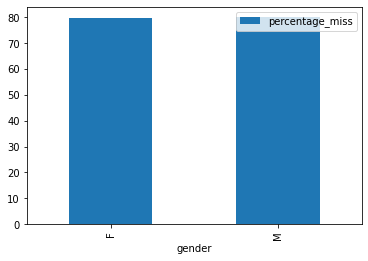

In [131]:
df_g.plot(kind='bar',x='gender',y='percentage_miss')

In [ ]:
#Men are slightly more likely to miss appointment compared to women.

In [10]:
df_ne =pd.DataFrame( df_no.neighbourhood.value_counts())
df_ne.reset_index(inplace=True)
df_ne.columns = ['neighbourhood','misses']
df_ne.sort_values(by='neighbourhood',inplace=True)

In [12]:
df_ne_all = pd.DataFrame(df.neighbourhood.value_counts())
df_ne_all.reset_index(inplace=True)
df_ne_all.columns = ['neighbourhood','total_appointments']
df_ne_all.sort_values(by='neighbourhood',inplace=True)

In [14]:
df_ne['total_appointments'] = df_ne_all['total_appointments']
df_ne['percentage_miss'] = (df_ne['misses']/df_ne['total_appointments'])*100

In [15]:
df_ne.head()

,neighbourhood,misses,total_appointments,percentage_miss
78,AEROPORTO,7,8,87.500000
17,ANDORINHAS,1741,2262,76.967286
65,ANTÔNIO HONÓRIO,221,282,78.368794
66,ARIOVALDO FAVALESSA,220,271,81.180812
58,BARRO VERMELHO,332,428,77.570093


In [18]:
df_ne.sort_values(by='percentage_miss',inplace=True,ascending=False)

In [19]:
df_ne

,neighbourhood,misses,total_appointments,percentage_miss
76,ILHA DO BOI,32,35,91.428571
78,AEROPORTO,7,8,87.500000
61,MÁRIO CYPRESTE,317,371,85.444744
50,DO CABRAL,472,560,84.285714
3,JARDIM DA PENHA,3246,3877,83.724529
...,...,...,...,...
59,SANTA CECÍLIA,325,423,76.832151
70,HORTO,133,175,76.000000
4,SANTA MARTHA,2635,3514,74.985771
34,SANTOS DUMONT,907,1276,71.081505


In [ ]:
# df_ne.plot(kind='scatter',x='neighbourhood',y='percentage_miss',)
# plt.xticks(rotation='vertical',size=10)


In [ ]:
# ILHA DO BOI neighbourhood has the highest percentage miss at 91.5%

In [30]:
df_no

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday


In [35]:
# Percentage of people who missed, received and did not receive the sms
df_no.sms_received.value_counts(normalize=True)*100

0    70.866588
1    29.133412
Name: sms_received, dtype: float64

In [40]:
# Percentage of people who attended, received and did not receive the sms
df_yes.sms_received.value_counts(normalize=True)*100

0    56.162911
1    43.837089
Name: sms_received, dtype: float64